In [1]:
from pandas import DataFrame, Series
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import sqlite3
from sqlalchemy import create_engine 

### plotly imports

In [6]:
from plotly.graph_objs import Bar, Scatter, Figure, Layout
from IPython.display import display, clear_output
import plotly.plotly as py
from plotly.widgets import GraphWidget

In [18]:
import ipywidgets as wigts
from ipywidgets import interact
w = wigts.Select(description='buildings:',options=['SDE1-02',"SDE1-03","SDE1-04","SDE1-05","SDE2-01","SDE2-02","SDE2-03","SDE3-01","SDE3-02","SDE3-03","SDE3-04"])
time_intev = widgets.FloatSlider(value=60,min=20,max=120.0,step=10,description='Interval(in mins):')

In [111]:
from datetime import datetime, timedelta
from bokeh.plotting import figure, output_notebook, show
from bokeh.io import push_notebook

In [112]:
x = ["UNKNOWN",'SDE1-02',"SDE1-03","SDE1-04","SDE1-05","SDE2-01","SDE2-02","SDE2-03","SDE3-01","SDE3-02","SDE3-03","SDE3-04","STAY"]
y = [5, 0,0,0,0,0, 0,0,1, 1, 8,0,0]

In [113]:
output_notebook()

Loading BokehJS ...

In [121]:
p = figure(title = "Device Movement",x_range = x,width = 800)
r = p.circle(counts.keys(), y, size=10, fill_color="orange")

In [122]:
def crowd_flow(start = "2016-04-16 00:10:01", bld = 'SDE2-03',lag = 80 ):
    sec = lag*60
    end = datetime.strptime(start, "%Y-%m-%d %H:%M:%S")+ timedelta(seconds = sec)
    mac_list = pd.read_sql_query('SELECT mac,statustype,sgtime,bldid,firstlocatedtime FROM wifi WHERE sgtime >= "{}" AND sgtime <= "{}"'.format(start,end),disk_engine)
    l = mac_list[mac_list.bldid==bld]["mac"].unique()
    counts = dict()
    for id in l:
        df_mac = mac_list[mac_list.mac==id]
    #only get those appears at bld in the first time
    #print "first rec:" ,df_mac[df_mac["sgtime"] == min(df_mac.sgtime)]["bldid"].iloc[0]
        if df_mac[df_mac["sgtime"] == min(df_mac.sgtime)]["bldid"].iloc[0] == bld:
            if df_mac.shape[0] == 1:
                counts["unknown"] = counts.get("unknown",0) + 1
                continue
            b_list = df_mac.bldid.unique()
        #print b_list
            if (len(b_list) == 1):
                counts["stay"] = counts.get("stay",0) + 1
                continue
            else:
                for b in b_list:
                    counts[b] = counts.get(b,0) + 1
                    continue
    r.data_source.data['y'] = counts.values()
    r.data_source.data['x'] = counts.keys()
    push_notebook()

In [123]:
show(p)

In [124]:
import ipywidgets as wigts
from ipywidgets import interact
interact(crowd_flow,bld = ['SDE1-02',"SDE1-03","SDE1-04","SDE1-05","SDE2-01","SDE2-02","SDE2-03","SDE3-01","SDE3-02","SDE3-03","SDE3-04"],lag=(15,240,5))

In [26]:
start = "2016-04-16 00:10:01"
lag = 60
sec = lag*60
end = datetime.strptime(start, "%Y-%m-%d %H:%M:%S")+ timedelta(seconds = sec)
print end

2016-04-16 01:10:01


In [40]:
mac_list = pd.read_sql_query('SELECT mac,statustype,sgtime,bldid,firstlocatedtime FROM wifi WHERE sgtime >= "{}" AND sgtime <= "{}"'.format(start,end),disk_engine)

In [44]:
l = mac_list[mac_list.bldid=='SDE2-02']["mac"].unique()

In [58]:
print len(l)

18


In [71]:
counts = dict()
bld ="SDE2-02"
for id in l:
    df_mac = mac_list[mac_list.mac==id]
     # only get those appears at bld in the first time
    print "first rec:" ,df_mac[df_mac["sgtime"] == min(df_mac.sgtime)]["bldid"].iloc[0]
    if df_mac[df_mac["sgtime"] == min(df_mac.sgtime)]["bldid"].iloc[0] == bld:
        if df_mac.shape[0] == 1:
            counts["unknown"] = counts.get("unknown",0) + 1
            continue
        b_list = df_mac.bldid.unique()
        print b_list
        if (len(b_list) == 1):
            counts["stay"] = counts.get("stay",0) + 1
            continue
        else:
            for b in b_list:
                counts[b] = counts.get(b,0) + 1
                continue

first rec: SDE2-02
[u'SDE2-02']
first rec: SDE2-02
[u'SDE2-02']
first rec: SDE2-02
[u'SDE2-02']
first rec: SDE2-02
[u'SDE2-02']
first rec: SDE2-02
first rec: SDE2-02
[u'SDE2-02' u'SDE2-03']
first rec: SDE2-02
first rec: SDE2-02
[u'SDE2-02']
first rec: SDE2-03
first rec: SDE2-02
[u'SDE2-02']
first rec: SDE1-03
first rec: SDE2-02
[u'SDE2-02']
first rec: SDE2-02
[u'SDE2-02']
first rec: SDE3-02
first rec: SDE2-02
first rec: SDE2-03
first rec: SDE2-02
first rec: SDE2-02


In [79]:
print counts.values()

[5, 1, 1, 8]


In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_file("categorical.html")

In [82]:
output_notebook()

Loading BokehJS ...

In [28]:
%colors linux
conn = sqlite3.connect('new.sqlite')
disk_engine = create_engine('sqlite:///new.sqlite')

In [3]:
number = pd.read_sql_query('SELECT DISTINCT mac,COUNT(*) as `device_numbers`,sgtime,bldid FROM wifi GROUP BY sgtime,bldid',disk_engine)

In [31]:
print number.head()
print number.shape

                 mac  device_numbers               sgtime    bldid
0  e8:50:8b:94:67:3b               1  2016-04-16 00:00:01  SDE1-02
1  f4:f2:6d:16:c9:0f               8  2016-04-16 00:00:01  SDE1-03
2  f4:f2:6d:17:7f:ad              10  2016-04-16 00:00:01  SDE1-04
3  f4:f2:6d:17:7e:95               2  2016-04-16 00:00:01  SDE1-05
4  00:21:91:84:c1:b6               1  2016-04-16 00:00:01  SDE2-01
(54348, 4)


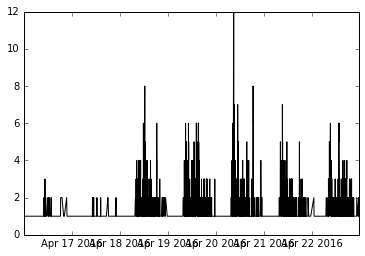

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
number.sgtime = pd.to_datetime(number['sgtime'])
plt.figure()
plt.plot(number[number['bldid']=='SDE1-02'].sgtime,number[number['bldid']=='SDE1-02'].device_numbers,'k')

## interactive show time distribution

In [4]:
from IPython.display import display
import plotly.plotly as py # interactive graphing
py.sign_in('coowesome', 'ar6x3dtl5c')
from plotly.graph_objs import Bar, Scatter, Marker, Layout
buildings = list(number.bldid.unique())
traces = []
for bld in buildings:
    plo_df = number[number['bldid']==bld]
    traces.append(Bar(x=plo_df['sgtime'],y = plo_df['device_numbers'],name = bld))
py.iplot({'data':traces,'layout': Layout(barmode = 'stack',xaxis={'tickangle': 40}, margin={'b': 150})}, filename='device detected by buildings')

The draw time for this plot will be slow for clients without much RAM.


/Users/AAA218/anaconda2/lib/python2.7/site-packages/plotly/plotly/plotly.py:1443: UserWarning:

Estimated Draw Time Slow



### Query for spatial pattern changing 

* test __bokeh widgets__

In [5]:

#select = Select(title="Building Option:", value="SDE1-02", options=['SDE1-02',"SDE1-03","SDE1-04","SDE1-05","SDE2-01","SDE2-02","SDE2-03","SDE3-01","SDE3-02","SDE3-03","SDE3-04"])

from bokeh.io import output_file, show
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Select

output_file("select.html")

select = Select(title="Building Option:", value="SDE1-02", options=['SDE1-02',"SDE1-03","SDE1-04","SDE1-05","SDE2-01","SDE2-02","SDE2-03","SDE3-01","SDE3-02","SDE3-03","SDE3-04"])
show(widgetbox(select))
def building_hd(attr, old ,new):
    print "old",old
    print "new",new
print select.on_change("value", building_hd)
#TOOLS="crosshair,pan,wheel_zoom,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select"

#p = figure(tools=TOOLS)

#p.scatter(x, y, radius=radii,
#          fill_color=colors, fill_alpha=0.6,
#          line_color=None)

#output_file("color_scatter.html", title="color_scatter.py example")

#show(p) 

None


In [46]:
import numpy as np

from bokeh.plotting import figure, show, output_file

N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

TOOLS="crosshair,pan,wheel_zoom,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select"

p = figure(tools=TOOLS)

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None)

output_file("color_scatter.html", title="color_scatter.py example")

show(p) 

In [ ]:
# input for a time period, building id, and change the time intervals for clustering
# 